# <center><u>Sarcasm Detection</u></center>
 **Acknowledgement**

Misra, Rishabh, and Prahal Arora. "Sarcasm Detection using Hybrid Neural Network." arXiv preprint arXiv:1908.07414 (2019).

**Required Files given in below link.**

https://drive.google.com/drive/folders/1xUnF35naPGU63xwRDVGc-DkZ3M8V5mMk

### Analysis By:
Soumalya Biswas (Group-3)

# =============================================================

## Install `Tensorflow2.0` 

In [0]:
!!pip uninstall tensorflow
!pip install tensorflow==2.0.0

## Get Required Files from Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import os
os.chdir('/content/drive/My Drive/Colab Notebooks/NLP/sentiment/')
path = '.'

In [0]:
#Set your project path 
project_path =  "/content/drive/My Drive/Colab Notebooks/NLP/sentiment/"

## Import Libraries

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

#**## Reading and Exploring Data**

## Read Data "Sarcasm_Headlines_Dataset.json". Explore the data and get  some insights about the data. ( 4 marks)
Hint - As its in json format you need to use pandas.read_json function. Give paraemeter lines = True.

In [5]:
dataset = pd.read_json(project_path + "Data/Sarcasm_Headlines_Dataset.json", lines=True)
#printing top 5 data
dataset.head()

,article_link,headline,is_sarcastic
0,https://www.huffingtonpost.com/entry/versace-b...,former versace store clerk sues over secret 'b...,0
1,https://www.huffingtonpost.com/entry/roseanne-...,the 'roseanne' revival catches up to our thorn...,0
2,https://local.theonion.com/mom-starting-to-fea...,mom starting to fear son's web series closest ...,1
3,https://politics.theonion.com/boehner-just-wan...,"boehner just wants wife to listen, not come up...",1
4,https://www.huffingtonpost.com/entry/jk-rowlin...,j.k. rowling wishes snape happy birthday in th...,0


In [6]:
rows, columns = dataset.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 26709 rows and 3 columns in the dataframe.


In [7]:
#Dataframe Information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26709 entries, 0 to 26708
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   article_link  26709 non-null  object
 1   headline      26709 non-null  object
 2   is_sarcastic  26709 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 626.1+ KB


<b>Comment: </b> I can see out of 3 column there is 1 integer (discrete variable) values column and that is our target column and 2 object type column available.  

In [8]:
# Checking the unique value
dataset.apply(lambda x: len(x.unique()))

article_link    26708
headline        26602
is_sarcastic        2
dtype: int64

<b>Comment: </b> So our is_sarcastic column (target col) has only 2 values which is very obvious and those are **1 = TRUE** and **0 = FALSE**  

In [9]:
# Checking for existing null values
dataset.isnull().values.any()

False

<b>Comment: </b> We dont have any missing values.

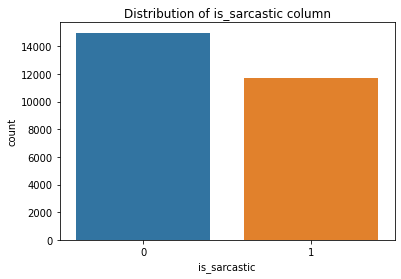

In [10]:
# Inference on Target Column

sns.countplot(dataset['is_sarcastic'])
plt.title('Distribution of is_sarcastic column')
plt.show()

<b> Comment: </b> I can clearly see that our target variable is having values with 1 and 0 which representing True and False. And amount of False value is more than the amount of True.

In [11]:
sarcasm_count = pd.DataFrame({'Labels': dataset["is_sarcastic"].unique(), 'is_sarcastic': dataset["is_sarcastic"].value_counts(),'Percentage (%)': dataset["is_sarcastic"].value_counts(normalize=True).mul(100)})
sarcasm_count

,Labels,is_sarcastic,Percentage (%)
0,0,14985,56.104684
1,1,11724,43.895316


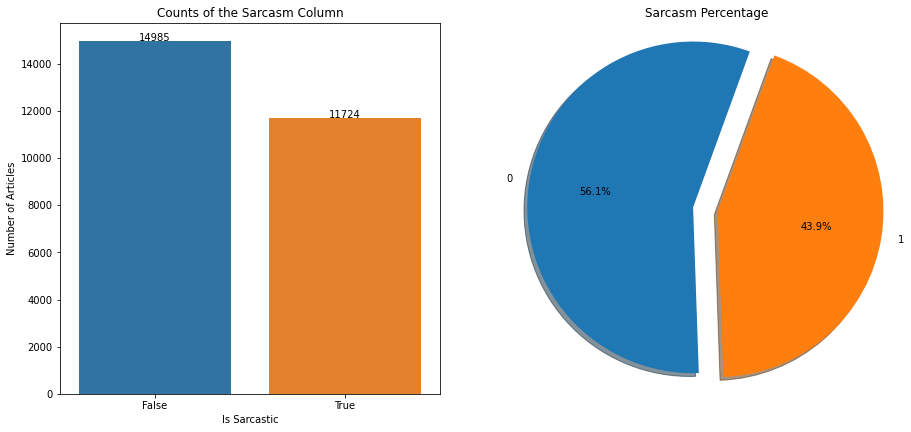

In [12]:
fig1 = plt.figure(figsize=(15,15))
fig1.add_subplot(2,2,1)
ax = sns.countplot(x="is_sarcastic", data=dataset)
plt.title('Counts of the Sarcasm Column')
plt.xlabel('Is Sarcastic')
plt.ylabel('Number of Articles')
ax.set_xticklabels(["False","True"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

fig1.add_subplot(2,2,2)
explode = (0, 0.15)
plt.pie(sarcasm_count["is_sarcastic"], explode=explode, labels=sarcasm_count["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.axis('equal')
plt.title("Sarcasm Percentage")
plt.show()

<b>Comment : </b> From the above graphs, clearly I can see the no. of Artcles which is either Sarcastic or Non Sarcastic and the value is 11724 and 14985 respectively. I used seaborn countplot function to display that.

**Displaying Word Clouds**

**is_sarcastic = False**

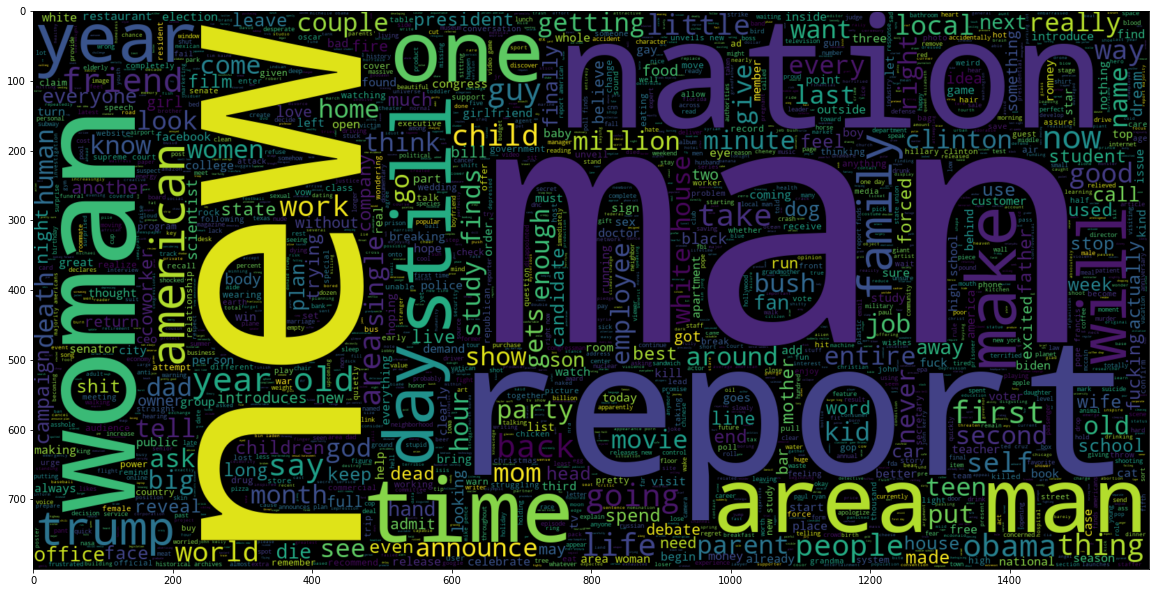

In [46]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

**is_sarcastic = True**

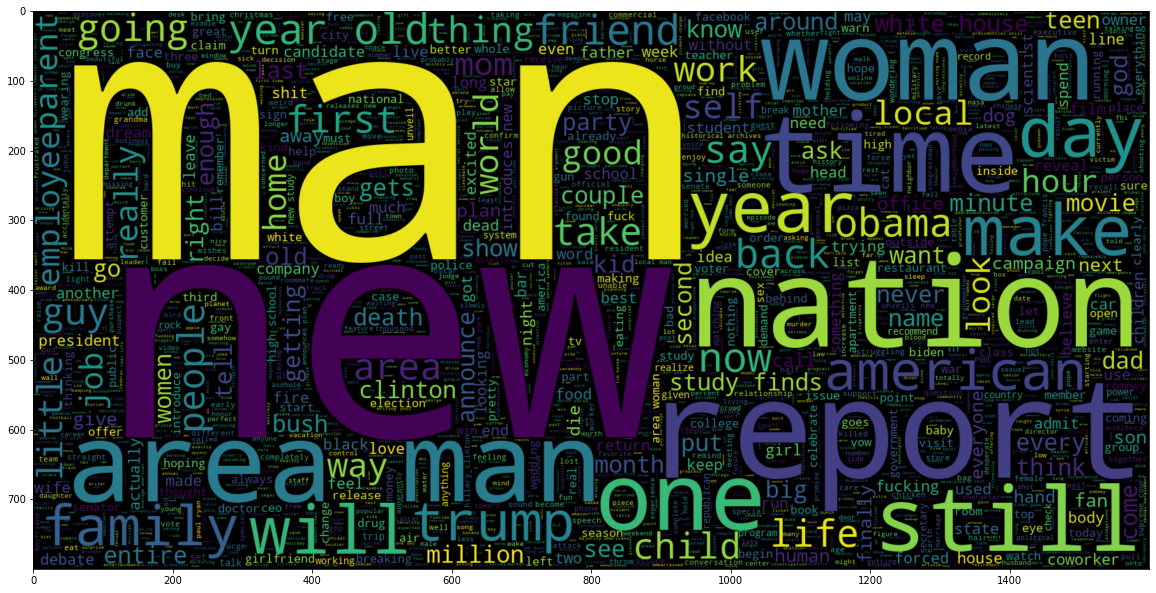

In [47]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800).generate(" ".join(df[df.is_sarcastic == 1].headline))
plt.imshow(wc , interpolation = 'bilinear')
plt.show()

## Drop `article_link` from dataset. ( 2 marks)
As we only need headline text data and is_sarcastic column for this project. We can drop artical link column here.

In [13]:
df = dataset.drop('article_link', axis=1)
# checking dataset after dropping `article_link` column
df.head()

,headline,is_sarcastic
0,former versace store clerk sues over secret 'b...,0
1,the 'roseanne' revival catches up to our thorn...,0
2,mom starting to fear son's web series closest ...,1
3,"boehner just wants wife to listen, not come up...",1
4,j.k. rowling wishes snape happy birthday in th...,0


## Get the Length of each line and find the maximum length. ( 4 marks)
As different lines are of different length. We need to pad the our sequences using the max length.

In [22]:
# Get max length of the line.

all_line_len = list(map(lambda x : len(x.split()),df['headline']))
maxlen = max(all_line_len)
print(f'The maximum length of the words is {maxlen}.')

word_count_df = pd.DataFrame({'Headline': df["headline"], 'Length': all_line_len })
word_count_df.head()

The maximum length of the words is 39.


,Headline,Length
0,former versace store clerk sues over secret 'b...,12
1,the 'roseanne' revival catches up to our thorn...,14
2,mom starting to fear son's web series closest ...,14
3,"boehner just wants wife to listen, not come up...",13
4,j.k. rowling wishes snape happy birthday in th...,11


#**## Modelling**

## Import required modules required for modelling.

In [0]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Flatten, Bidirectional, GlobalMaxPool1D, SpatialDropout1D
from tensorflow.keras.models import Model, Sequential

# Set Different Parameters for the model. ( 2 marks)

In [0]:
max_features = 10000
maxlen = maxlen
embedding_size = 200

## Apply Keras Tokenizer of headline column of your data.  ( 4 marks)
Hint - First create a tokenizer instance using Tokenizer(num_words=max_features) 
And then fit this tokenizer instance on your data column df['headline'] using .fit_on_texts()

In [0]:
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(df['headline'])

# Define X and y for your model.

In [26]:
X = tokenizer.texts_to_sequences(df['headline'])
X = pad_sequences(X, maxlen = maxlen, padding='post')
y = np.asarray(df['is_sarcastic'])

print("Number of Samples:", len(X))
print(X[0])
print("Number of Labels: ", len(y))
print(y[0])

Number of Samples: 26709
[ 307  678 3336 2297   47  381 2575    5 2576 8433    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0]
Number of Labels:  26709
0


## Get the Vocabulary size ( 2 marks)
Hint : You can use tokenizer.word_index.

In [27]:
print("word_index : ",tokenizer.word_index)

word_index :  {'to': 1, 'of': 2, 'the': 3, 'in': 4, 'for': 5, 'a': 6, 'on': 7, 'and': 8, 'with': 9, 'is': 10, 'new': 11, 'trump': 12, 'man': 13, 'from': 14, 'at': 15, 'about': 16, 'you': 17, 'this': 18, 'by': 19, 'after': 20, 'up': 21, 'out': 22, 'be': 23, 'how': 24, 'as': 25, 'it': 26, 'that': 27, 'not': 28, 'are': 29, 'your': 30, 'his': 31, 'what': 32, 'he': 33, 'all': 34, 'just': 35, 'who': 36, 'has': 37, 'will': 38, 'more': 39, 'one': 40, 'into': 41, 'report': 42, 'year': 43, 'why': 44, 'have': 45, 'area': 46, 'over': 47, 'donald': 48, 'u': 49, 'day': 50, 'says': 51, 's': 52, 'can': 53, 'first': 54, 'woman': 55, 'time': 56, 'like': 57, 'her': 58, "trump's": 59, 'old': 60, 'no': 61, 'get': 62, 'off': 63, 'an': 64, 'life': 65, 'people': 66, 'obama': 67, 'now': 68, 'house': 69, 'still': 70, "'": 71, 'women': 72, 'make': 73, 'was': 74, 'than': 75, 'white': 76, 'back': 77, 'my': 78, 'i': 79, 'clinton': 80, 'down': 81, 'if': 82, '5': 83, 'when': 84, 'world': 85, 'could': 86, 'we': 87, 't

In [28]:
vocab_size = len(tokenizer.word_index) + 1
print("vocab_size : ",vocab_size)

vocab_size :  29657


#**## Word Embedding**

## Get Glove Word Embeddings

In [29]:
glove_file = project_path + "glove.6B.zip"
print(glove_file)

/content/drive/My Drive/Colab Notebooks/NLP/sentiment/glove.6B.zip


In [0]:
Extract Glove embedding zip file

from zipfile import ZipFile
with ZipFile(glove_file, 'r') as z:
 z.extractall()

# Get the Word Embeddings using Embedding file as given below.

In [0]:
EMBEDDING_FILE = './glove.6B.200d.txt'

embeddings = {}
for o in open(EMBEDDING_FILE):
    word = o.split(" ")[0]
    # print(word)
    embd = o.split(" ")[1:]
    embd = np.asarray(embd, dtype='float32')
    # print(embd)
    embeddings[word] = embd



In [31]:
len(embeddings)

400000

# Create a weight matrix for words in training docs

In [32]:
num_words = vocab_size
embedding_matrix = np.zeros((num_words, 200))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

len(embeddings.values())

400000

In [33]:
embedding_matrix.shape

(29657, 200)

## Create and Compile your Model  ( 7 marks)
Hint - Use Sequential model instance and then add Embedding layer, Bidirectional(LSTM) layer, then dense and dropout layers as required. 
In the end add a final dense layer with sigmoid activation for binary classification.


In [34]:
model_input = Input(shape=(maxlen,))
x = Embedding(vocab_size, embedding_size, weights=[embedding_matrix])(model_input)
x = Bidirectional(LSTM(128, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
x = GlobalMaxPool1D()(x)
x = Dense(300, activation="relu")(x)
x = Dropout(0.1)(x)
x = Flatten()(x)
x = Dense(1, activation="sigmoid")(x)
model = Model(inputs=model_input, outputs=x)
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 39)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 39, 200)           5931400   
_________________________________________________________________
bidirectional (Bidirectional (None, 39, 256)           336896    
_________________________________________________________________
global_max_pooling1d (Global (None, 256)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               77100     
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
flatten (Flatten)            (None, 300)               0     

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer='adam',metrics = ['accuracy'])

# Fit your model with a batch size of 100 and validation_split = 0.2. and state the validation accuracy ( 5 marks)


In [0]:
x_train,x_test,y_train,y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [37]:
print("Shape of x_train : ",x_train.shape)
print("Shape of x_test : ",x_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test : ",y_test.shape)

Shape of x_train :  (21367, 39)
Shape of x_test :  (5342, 39)
Shape of y_train :  (21367,)
Shape of y_test :  (5342,)


In [50]:
batch_size = 100
epochs = 5

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/5
214/214 [==============================] - 111s 519ms/step - loss: 0.0356 - accuracy: 0.9889 - val_loss: 0.5375 - val_accuracy: 0.8718
Epoch 2/5
214/214 [==============================] - 111s 520ms/step - loss: 0.0265 - accuracy: 0.9902 - val_loss: 0.6351 - val_accuracy: 0.8753
Epoch 3/5
214/214 [==============================] - 111s 521ms/step - loss: 0.0218 - accuracy: 0.9926 - val_loss: 0.6832 - val_accuracy: 0.8680
Epoch 4/5
214/214 [==============================] - 112s 522ms/step - loss: 0.0191 - accuracy: 0.9931 - val_loss: 0.7223 - val_accuracy: 0.8695
Epoch 5/5
214/214 [==============================] - 112s 521ms/step - loss: 0.0113 - accuracy: 0.9961 - val_loss: 0.7903 - val_accuracy: 0.8712


**Analyzing Model Accuracy**

In [51]:
score,acc = model.evaluate(x_test, y_test, verbose = 2, batch_size = batch_size)
print("loss: %.2f" % (score))
print("accuracy: %.2f" % (acc))

54/54 - 2s - loss: 0.7903 - accuracy: 0.8712
loss: 0.79
accuracy: 0.87


**Graph Presentation for Accuracy and Validation loss**

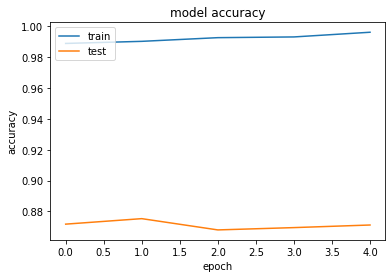

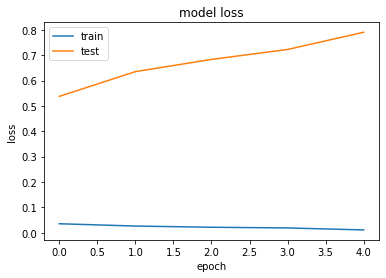

In [52]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Prediction through Model**

In [0]:
#get prediction accuarcy for testing dataset samples
predicted = model.predict(x_test)
predicted_y = predicted.round().ravel().astype('int32')

In [54]:
predicted_df = pd.DataFrame({ "Y Actual":y_test, "Y Predict": predicted_y })
predicted_df.head()

,Y Actual,Y Predict
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1


In [55]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print(classification_report(y_test, predicted_y, target_names=['False','True']))

              precision    recall  f1-score   support

       False       0.90      0.86      0.88      3041
        True       0.83      0.88      0.85      2301

    accuracy                           0.87      5342
   macro avg       0.87      0.87      0.87      5342
weighted avg       0.87      0.87      0.87      5342



**Confusion Matrix**

In [59]:
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test,predicted_y)
confusionMatrix

array([[2630,  411],
       [ 277, 2024]])

**Predict some headlines**

In [0]:
INDEX_FROM=3 
word_to_id = tokenizer.word_index
word_to_id = {k:(v+INDEX_FROM) for k,v in word_to_id.items()}
word_to_id["<PAD>"] = 0
word_to_id["<START>"] = 1
word_to_id["<UNK>"] = 2
word_to_id["<UNUSED>"] = 3

id_to_word = {value:key for key,value in word_to_id.items()}

In [0]:
def predict_sarcasm(perc):
  perc_round = perc.round()
  if(perc_round == 0):
    return "Not Sarcastic"
  elif (perc_round == 1):
    return "Sarcastic"

In [0]:
# Sample Review
sample_1 = 123
sample_2 = 345 

headline1 = x_test[sample_1]
headline2 = x_test[sample_2]

In [70]:
print('Headline 1 Label : {}({})'.format(predict_sarcasm(y_test[sample_1]), y_test[sample_1]))
print("=========================================")
print(' '.join(id_to_word[id] for id in headline1 ))


Headline 1 Label : Not Sarcastic(0)
reed bid greatest to oppose you sitcom in floods you're <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [71]:
print('Headline 2 Label : {}({})'.format(predict_sarcasm(y_test[sample_2]), y_test[sample_2]))
print("=========================================")
print(' '.join(id_to_word[id] for id in headline2 ))

Headline 2 Label : Sarcastic(1)
'well by in traffic less need trump really al 'trump s just got book <START> table hampshire <UNK> 70 <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD> <PAD>


In [74]:
# Texts 
texts = (headline1, headline2)
padded_texts = pad_sequences(texts, maxlen=maxlen, value = 0.0)

# Generating predictions
predictions = model.predict(padded_texts)

print("Headline 1 Prediction : {}".format(predict_sarcasm(predictions[0])))
print(predictions[0])

print("=========================================")

print("Headline 2 Prediction : {}".format(predict_sarcasm(predictions[1])))
print(predictions[1])

Headline 1 Prediction : Not Sarcastic
[2.8506402e-13]
Headline 2 Prediction : Sarcastic
[1.]


<b>Comment : </b> We can see our model is able to predict correctly